# Exercises on Laplace approximation in Rasmus Baath's blog

[Easy Laplace Approximation of Bayesian Models in R](http://www.sumsar.net/blog/2013/11/easy-laplace-approximation/)

### 1. Model: likelihood, prior, non normalized posterior

In [ ]:
n1<-10
n0<-8
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

#### Laplace approximation

In [ ]:
# q=log(Lik)
# Equating q'(theta)=0
mu<-n1/n
round(mu,4)
# 
# Derived as sigma2= 1/|q''(n1/n)|
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

In [ ]:
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}
u<-seq(0,1,length=500)
plot(u,h(u),"l",lwd=2,col="blue")
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
# Alternatively, using the fact that the model is Beta-Binomial, thus the posterior is
# Beta(n1+1,n0+1)
# lines(u,dbeta(u,shape1=n1+1,shape2=n0+1),col="green",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

#### Repeat same Laplace approximation, now with number of heads $n_{1}=4$ and number of tails $n_{0}=2$

In [ ]:
n1<-4
n0<-2
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

In [ ]:
mu<-n1/n
round(mu,4)
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

In [ ]:
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}
u<-seq(0,1,length=500)
plot(u,h(u),"l",lwd=2,col="blue")
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

## 2. Normal data with a known $\mu$
 
### Flat prior for $\sigma$
 
Likelihood is normal with known $\mu$ and standard deviation $\sigma$.

Assume a flat prior for $\sigma$.

Laplace approximate posterior of the standard deviation $\sigma$, given $n$ random numbers distributed as Normal(10, 4): 

In [8]:
#install.packages("extraDistr",dependencies=TRUE,repos="https://cloud.r-project.org")
require(extraDistr)

In [29]:
mu<-10
n<-40  # n was 8 in the original post
sigma.data.gen<-4
x<-rnorm(n = n, mean = mu, sd = sigma.data.gen)
## [1] 10.770  4.213  8.707 16.489  7.244 18.168 13.775 18.328
round(x,4) 

[1] 12.6379  9.1143  6.1514 10.7498 10.0490 12.8491  6.9851 10.1528 14.7137
[10]  9.3872  9.3532 15.8410 18.0378  9.6882 15.4174  5.8913  5.8353  6.5175
[19] 13.4125  7.5090 14.8628  3.5144  9.7257  9.7481 14.3028 14.5164 11.8006
[28] 10.2023  9.5027 13.6480 10.8399  8.4599 15.4871 10.6359  9.1806  6.5916
[37]  6.7621 12.1336 10.2750  7.0529

In [30]:
s2mu<-sum((x-mu)^2)/n
Laplace.Approx.mean<-s2mu
Laplace.Approx.sd<-sqrt(2/n)*s2mu
round(c(Laplace.Approx.mean,Laplace.Approx.sd),4)

[1] 11.1753  2.4989

Exact posterior pdf, in terms of $v=\sigma^{2}$ is:

$$
    h(v\,|\,x)\propto v^{-n/2}\cdot\big\{-\dfrac{n\,s^2(\mu)}{2\,v}\big\}.
$$

This is an inverse gamma distribution, $\operatorname{IG}(\alpha,\beta)$, where:

$$
    \left\{\begin{array}{ccl}
    \alpha &=&\dfrac{n}{2}-1,\\
    \beta  &=&\dfrac{n\,s^{2}(\mu)}{2}.
    \end{array}\right.
$$

In [31]:
alpha<-n/2-1
beta<-n*s2mu/2

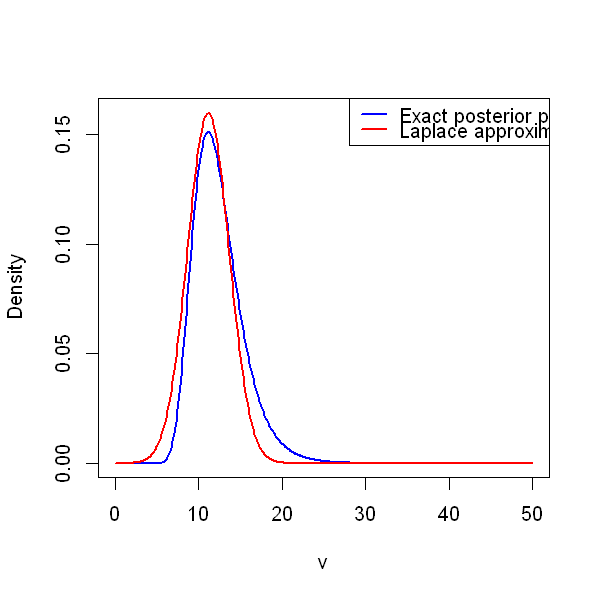

In [43]:
v<-seq(0,50,length=500)
y<-dinvgamma(v,alpha,beta)
y.max<-ceiling(50*max(y))/50
options(repr.plot.width=5, repr.plot.height=5)
plot(v,y,type="l",lwd=2,col="blue",xlab="v",ylab="Density",ylim=c(0,y.max),pin=c(3,3))
lines(v,dnorm(v,mean=Laplace.Approx.mean,sd=Laplace.Approx.sd),lwd=2,col="red")
legend("topright",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

[1] 0.1510093

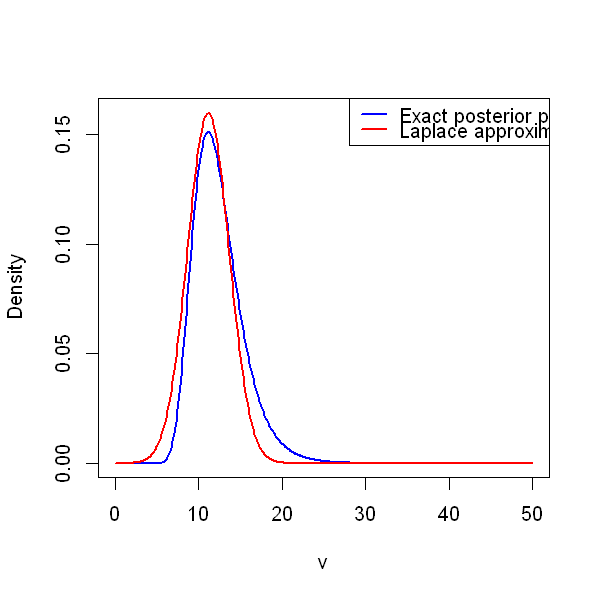

In [42]:
v<-seq(0.00001,50,length=500) # sequence of non-zeros but values close to zeros in order to avoid nans
nnh<-function(v){v^{-n/2}*exp(-n*s2mu/(2*v))}
Z<-integrate(nnh,0.0001,50)$value
h<-function(t){nnh(t)/Z}
options(repr.plot.width=5, repr.plot.height=5)
y<-h(v)
max(y)
y.max<-ceiling(50*max(y))/50
plot(v,y,type="l",lwd=2,col="blue",xlab="v",ylab="Density",ylim=c(0,y.max))
lines(v,dnorm(v,Laplace.Approx.mean,Laplace.Approx.sd),lwd=2,col="red")
legend("topright",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

## 3. Normal data with both parameters unknown

### Sigma with a nonconjugate prior

#### A $\operatorname{LogNormal}$ instead of an inverse gamma $\operatorname{IG}$

$$
    y_{i}\sim\operatorname{Normal}(\mu,\sigma^{2})
$$

$$
    \mu\sim\operatorname{Normal}(0,100^2)
$$

$$
    \sigma\sim\operatorname{LogNormal}(0,4^2)
$$

Here $y$ is $n=20$ datapoints generated like the following:

In [52]:
set.seed(1337)
n<-20
m<-10
s<-5
y <- rnorm(n, mean=m,sd=s)
c(mean = mean(y), sd = sd(y)) 

mean        sd 
12.720678  5.761939

Define a function calculating the unnormalized log posterior of the model above 
given a parameter vector $p$ and a vector of datapoints $y$.

In [53]:
model<-function(p,y){
    log_lik<-sum(dnorm(y,p["mu"],p["sigma"],log=TRUE))  # the log likelihood
    log_post<-log_lik+dnorm(p["mu"],0,100,log = TRUE)+dlnorm(p["sigma"],0,4,log = TRUE)
    return(log_post)
    } 

In [54]:
inits <- c(mu = 0.00001, sigma = 1)
fit <- optim(inits, model, control = list(fnscale = -1), hessian = TRUE, y = y)
fit

,mu,sigma
mu,-0.669971421,-0.001409068
sigma,-0.001409068,-1.418103384


In [55]:
param_mean <- fit$par
param_cov_mat <- solve(-fit$hessian) #~ gives the inverse for a given non-singular matrix
round(param_mean, 4)

mu   sigma 
12.7149  5.4641

In [56]:
round(param_cov_mat, 3)

,mu,sigma
mu,1.493,-0.001
sigma,-0.001,0.705


In [59]:
#install.packages("mvtnorm",dependencies=TRUE,repos="https://cloud.r-project.org")
require(mvtnorm)
samples <- rmvnorm(10000, param_mean, param_cov_mat) #~ matrix of two columns

In [60]:
str(samples)

 num [1:10000, 1:2] 12.4 11.9 16 13 14.3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "mu" "sigma"


### Posterior predictive pdf

Now we add a third column, `pred`, where we generate $n$ samples, each from the pdf with the parameters $\mu$ and $\sigma$ from the first two columns.

In [61]:
samples <- cbind(samples, pred = rnorm(n = nrow(samples), samples[, "mu"], samples[,"sigma"]))

In [62]:
str(samples)

 num [1:10000, 1:3] 12.4 11.9 16 13 14.3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "mu" "sigma" "pred"


In [69]:
#install.packages("coda",dependencies=TRUE,repos="https://cloud.r-project.org")
require(coda)
#install.packages("lattice",dependencies=TRUE,repos="https://cloud.r-project.org")
require(lattice)
samples <- mcmc(samples) #~ casting, only prepare the object to be analysed

Loading required package: lattice


In [70]:
str(samples)

 'mcmc' num [1:10000, 1:3] 12.4 11.9 16 13 14.3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "mu" "sigma" "pred"
 - attr(*, "mcpar")= num [1:3] 1 10000 1


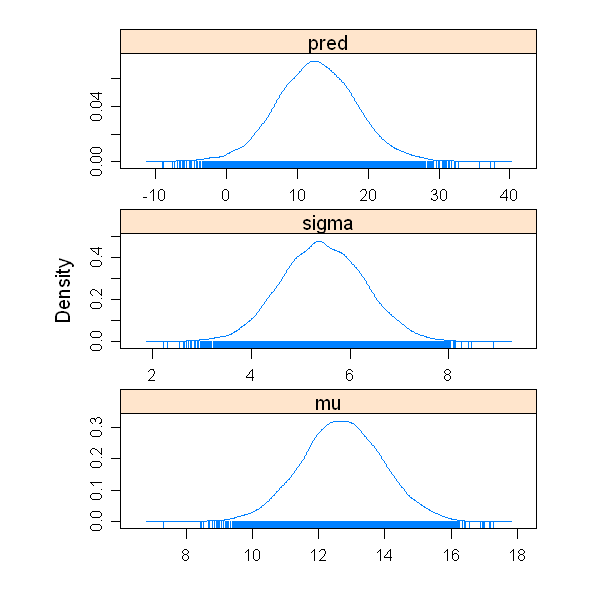

In [71]:
densityplot(samples)

In [72]:
summary(samples)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean     SD Naive SE Time-series SE
mu    12.710 1.2334 0.012334       0.012334
sigma  5.452 0.8393 0.008393       0.008646
pred  12.707 5.6310 0.056310       0.056310

2. Quantiles for each variable:

        2.5%    25%    50%    75%  97.5%
mu    10.295 11.891 12.707 13.540 15.137
sigma  3.829  4.881  5.439  6.021  7.093
pred   1.522  8.986 12.668 16.416 23.996
